In [2]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import cv2
import re

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean
import networkx as nx

# set working directory
os.chdir("/Users/antoine/Harvard/MegasonLab/presentations/20231206_soma")

font_props = {'family': 'Myriad Pro', 'size': 11}
font_props_text = {'family': 'Myriad Pro', 'size': 9}
title_font = FontProperties(family='Myriad Pro', size=11)


# colorblind-friendly colors
CB_palette = ['', '#f781bf', '#984ea3']

# set style
#sns.set_style("white")

In [63]:
with open(f"/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/division/20231218_division_2xtargetvolume-based_1-500/20231218_division_2xtargetvolume-based_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro'

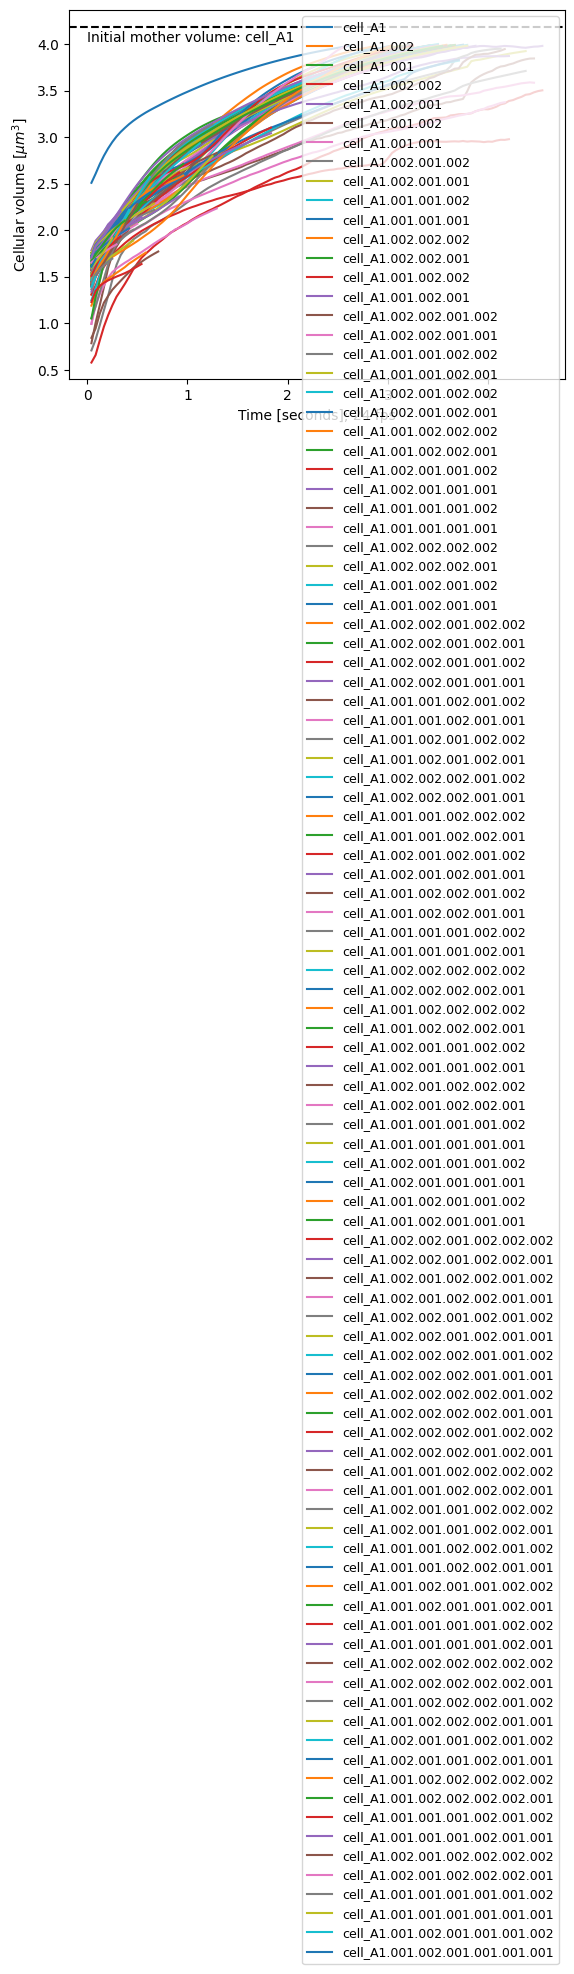

In [66]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Frame rate
fps = 24

# Accumulate data for plotting on the same graph
for cell_name, volumes in volumes1.items():
    time_points = [(frame + 1) / fps for frame in range(len(volumes))]  # Convert frames to time
    plt.plot(time_points, volumes, label=cell_name)

# Adding a horizontal line at y=4
plt.axhline(y=4.189, color='black', linestyle='--')
plt.text(0, 4.15, 'Initial mother volume: cell_A1', ha='left', va='top')

plt.xlabel('Time [seconds]; 24 fps')
plt.ylabel(r'Cellular volume $[\mu m^3]$')
plt.legend(prop=FontProperties(family='Myriad Pro', size=9))

# Save the plot
plt.savefig("division_volumes.png", transparent=False, dpi=500)
plt.show()


In [17]:
# convert sequence of images into mp4

# Path to the directory containing your images
image_folder = '/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240422_random_cell_mixing_2_adhesion'

# Get the list of images
images = [img for img in os.listdir(image_folder) if img.endswith(".tif")] # Change the extension as needed
print(images)

# Sort the images based on their names to maintain sequence
#images.sort(key=lambda x: int(re.search(r'\d+(?=\.\w+$)', x).group()))
images = np.sort(images)

# Define the video output settings
frame_width, frame_height = cv2.imread(os.path.join(image_folder, images[0])).shape[1], cv2.imread(os.path.join(image_folder, images[0])).shape[0]
video_name = '/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240422_random_cell_mixing_2_adhesion/output.mp4'

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(video_name, fourcc, 24, (frame_width, frame_height))

# Iterate through the images and write to the video
for image in images:
    img_path = os.path.join(image_folder, image)


    frame = cv2.imread(img_path)
    out.write(frame)

# Release the VideoWriter object
out.release()


['img_0272.tif', 'img_0266.tif', 'img_0299.tif', 'img_0058.tif', 'img_0070.tif', 'img_0064.tif', 'img_0138.tif', 'img_0104.tif', 'img_0110.tif', 'img_0111.tif', 'img_0105.tif', 'img_0139.tif', 'img_0065.tif', 'img_0071.tif', 'img_0059.tif', 'img_0298.tif', 'img_0267.tif', 'img_0273.tif', 'img_0259.tif', 'img_0265.tif', 'img_0271.tif', 'img_0067.tif', 'img_0073.tif', 'img_0098.tif', 'img_0113.tif', 'img_0107.tif', 'img_0106.tif', 'img_0112.tif', 'img_0099.tif', 'img_0072.tif', 'img_0066.tif', 'img_0270.tif', 'img_0264.tif', 'img_0258.tif', 'img_0260.tif', 'img_0274.tif', 'img_0248.tif', 'img_0062.tif', 'img_0076.tif', 'img_0089.tif', 'img_0116.tif', 'img_0102.tif', 'img_0300.tif', 'img_0103.tif', 'img_0117.tif', 'img_0088.tif', 'img_0077.tif', 'img_0063.tif', 'img_0249.tif', 'img_0275.tif', 'img_0261.tif', 'img_0277.tif', 'img_0263.tif', 'img_0288.tif', 'img_0075.tif', 'img_0061.tif', 'img_0049.tif', 'img_0101.tif', 'img_0115.tif', 'img_0129.tif', 'img_0128.tif', 'img_0114.tif', 'img_01

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [18]:
import os
import subprocess

def convert_mp4_to_gif(input_file, output_file, fps, scale, overwrite=False):
    """
    Convert an MP4 video to a high-quality GIF.

    :param input_file: Input MP4 file path.
    :param output_file: Output GIF file path.
    :param fps: Frames per second for the GIF (default is 10).
    :param scale: Scale the output GIF by a factor (e.g., 0.5 for half size).
    :param overwrite: Whether to overwrite the output file if it already exists (default is False).
    """
    # Check if the output file exists and overwrite is False
    if not overwrite and os.path.exists(output_file):
        print(f"Output file '{output_file}' already exists. Skipping conversion.")
        return

    command = [
        'ffmpeg',
        '-i', input_file,
        '-vf', f'fps={fps}',
        '-loop', '0',
        '-f', 'gif',
    ]
    if scale:
        command.extend(['-vf', f'scale=iw*{scale}:ih*{scale}'])
    command.append(output_file)

    subprocess.run(command)

# Example usage:
convert_mp4_to_gif('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240422_random_cell_mixing_2_adhesion/output.mp4', '/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/motion_diffusion/20240422_random_cell_mixing_2_adhesion/output.gif', fps=1, scale=1, overwrite=True)


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.0_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --di

In [11]:
# wide_border_qrcode.py

import segno

qrcode = segno.make_qr("https://iac.hms.harvard.edu/teaching/")
qrcode.save(
    "/Users/antoine/Harvard/IAC/QuPath_workshop/google_from_wide_border_qrcode.png",
    scale=5,
    border=0,
    dark="black",
    light="transparent"
)

ValueError: Unsupported color "transparent". Neither a known web color name nor a color in hexadecimal format.

In [13]:
import qrcode
from PIL import Image

def generate_qr_code(data, filename):
    # Generate QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    
    qr.add_data(data)
    qr.make(fit=True)
    
    # Create an image from the QR Code instance
    img = qr.make_image(fill_color="black", back_color="transparent")
    
    # Save image
    img.save(filename)

if __name__ == "__main__":
    data = "https://iac.hms.harvard.edu/teaching/"  # Enter your data here
    filename = "/Users/antoine/Harvard/IAC/QuPath_workshop/black_qr_code.png"  # Output filename
    generate_qr_code(data, filename)
    print(f"QR code saved as {filename}")


QR code saved as /Users/antoine/Harvard/IAC/QuPath_workshop/black_qr_code.png


In [10]:
# import modules
import qrcode
from PIL import Image

# taking image which user wants 
# in the QR code center
Logo_link = '/Users/antoine/Harvard/IAC/IAC_logos/IAC_Logo_Raccoon.png'

logo = Image.open(Logo_link)

# taking base width
basewidth = 100

# adjust image size
wpercent = (basewidth/float(logo.size[0]))
hsize = int((float(logo.size[1])*float(wpercent)))
logo = logo.resize((basewidth, hsize))
QRcode = qrcode.QRCode(
	error_correction=qrcode.constants.ERROR_CORRECT_H
)

# taking url or text
url = 'https://iac.hms.harvard.edu/teaching/'

# adding URL or text to QRcode
QRcode.add_data(url)

# generating QR code
QRcode.make()

# taking color name from user
QRcolor = 'darkred'

# adding color to QR code
QRimg = QRcode.make_image(
	fill_color=QRcolor).convert('RGB')

# set size of QR code
pos = ((QRimg.size[0] - logo.size[0]) // 2,
	(QRimg.size[1] - logo.size[1]) // 2)
QRimg.paste(logo, pos)

# save the QR code generated
QRimg.save('/Users/antoine/Harvard/IAC/QuPath_workshop/google_from_wide_border_qrcode.png')

print('QR code generated!')


QR code generated!
